# Assignment 2 - Classification of Sentences from Medical Publications

**Submission deadline: Friday 23 April, 11pm** 

**Penalty for late submission: 2 marks per day late or part thereof**

**Assessment marks: 20 marks (20% of the total unit assessment)**

In this assignment you will implement several systems that classify sentences from the abstracts of medical publications.

The data is from a Kaggle in Class competition what we organised in 2012, as part of the Australasian Language Technology Association series of shared tasks: 

* [ALTA-NICTA Challenge](https://www.kaggle.com/c/alta-nicta-challenge2)

For more information about the original shared task, follow these links:

* [Description of the 2012 ALTA-NICTA Challenge](http://www.alta.asn.au/events/sharedtask2012/description.html).
* [Kaggle-in-class Competition Page](https://www.kaggle.com/c/alta-nicta-challenge2).


## Data
The data are stored in this CSV file:

* [train.csv](train.csv)

Below you can see the first lines of the file:

```
Prediction,Label,Document,Sentence,Text
0,background,10072623,1,OBJECTIVES
0,intervention,10072623,1,OBJECTIVES
0,population,10072623,1,OBJECTIVES
0,outcome,10072623,1,OBJECTIVES
1,other,10072623,1,OBJECTIVES
0,"study design",10072623,1,OBJECTIVES
1,background,10072623,2,"We wanted to evaluate the urodynamic changes of radical retropubic prostatectomy in patients with localized prostate cancer and identify specific factors that could influence the postoperative continence status."
1,intervention,10072623,2,"We wanted to evaluate the urodynamic changes of radical retropubic prostatectomy in patients with localized prostate cancer and identify specific factors that could influence the postoperative continence status."
1,population,10072623,2,"We wanted to evaluate the urodynamic changes of radical retropubic prostatectomy in patients with localized prostate cancer and identify specific factors that could influence the postoperative continence status."
0,outcome,10072623,2,"We wanted to evaluate the urodynamic changes of radical retropubic prostatectomy in patients with localized prostate cancer and identify specific factors that could influence the postoperative continence status."
0,other,10072623,2,"We wanted to evaluate the urodynamic changes of radical retropubic prostatectomy in patients with localized prostate cancer and identify specific factors that could influence the postoperative continence status."
0,"study design",10072623,2,"We wanted to evaluate the urodynamic changes of radical retropubic prostatectomy in patients with localized prostate cancer and identify specific factors that could influence the postoperative continence status."
```

Each line represents the label of one sentence. The file is in CSV format (comma separated values), and the values correspond to the following:

1. `Prediction`: 1 if the text has the label, 0 if it doesn't.
2. `Label`: One of `background`, `intervention`, `population`, `outcome`, `study design`, `other` (see below).
3. `Document`: Document ID. A document may contain several sentences.
4. `Sentence`: Sentence ID. 1 for the first sentence, 2 for the second sentence, and so on.
5. `Text`: The contents of the sentence.

A sentence may have 1 or more of 6 possible labels, and consequently the same sentence appears in multiple lines, one per label. The possible labels are: 

* `background`: the sentence describes background information.
* `intervention`: the sentence describes a medical intervention.
* `population`: the sentence describes characteristics of the population being described in the publication. For example, the age of the subjects of study, their country of origin, etc.
* `outcome`: the sentence describes the outcome of the study, e.g. whether the intervention was effective.
* `study design`: the sentence contains details of the study design.
* `other`: anything else. For example, in the sample above, the text "OBJECTIVES" was a section heading. 

The first number of each line indicates whether the label is assigned to the sentence (1) or not (0).

For example, the first sentence of document with ID 10072623 has the label "other", but the second sentence has the labels "background", "intervention", and "population".

**Your task will be to write code that predicts the label or labels of the input sentences.** This is what is called "multi-label classification".

**If you haven't completed the exercises of week 6 practical, complete them before attempting this assignment. They are designed to help with the assignment.**

The following code uses the `pandas` library (https://pandas.pydata.org/) to read the data, and `matplotlib` (https://matplotlib.org/) to plot the distribution of labels.

In [12]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
train_pd = pd.read_csv('train.csv')
train_pd.head(10)

,Prediction,Label,Document,Sentence,Text
0,0,background,10072623,1,OBJECTIVES
1,0,intervention,10072623,1,OBJECTIVES
2,0,population,10072623,1,OBJECTIVES
3,0,outcome,10072623,1,OBJECTIVES
4,1,other,10072623,1,OBJECTIVES
5,0,study design,10072623,1,OBJECTIVES
6,1,background,10072623,2,We wanted to evaluate the urodynamic changes o...
7,1,intervention,10072623,2,We wanted to evaluate the urodynamic changes o...
8,1,population,10072623,2,We wanted to evaluate the urodynamic changes o...
9,0,outcome,10072623,2,We wanted to evaluate the urodynamic changes o...


To plot the data we will convert the data from a "long" format to a "wide" format that can be processed more easily. In this wide format, there is one column for each label. The code to do this uses panda's `pivot_table`:

In [3]:
train_pd = train_pd.pivot_table(index=['Document','Sentence','Text'], columns=['Label'], values='Prediction').reset_index() 
train_pd.head()

Label,Document,Sentence,Text,background,intervention,other,outcome,population,study design
0,145506,1,The rare liquor leakage syndrome with cranial ...,1,0,0,0,0,0
1,145506,2,This does not occur after a suboccipital punct...,1,0,0,0,0,0
2,145506,3,A report is given on three cases with differen...,0,0,0,0,1,0
3,145506,4,The prognosis of the eye-muscle paresis is good.,0,0,0,1,0,0
4,145506,5,Restitutio ad integrum resulted.,0,0,0,1,0,0


Let's plot the distribution of labels:

In [4]:
labels = ['background', 'intervention', 'population', 'outcome', 'study design', 'other']
label_counts = []
for l in labels:
    counts = train_pd[l].sum()
    label_counts.append(counts)
print(label_counts)

[2031, 565, 662, 3564, 193, 2712]


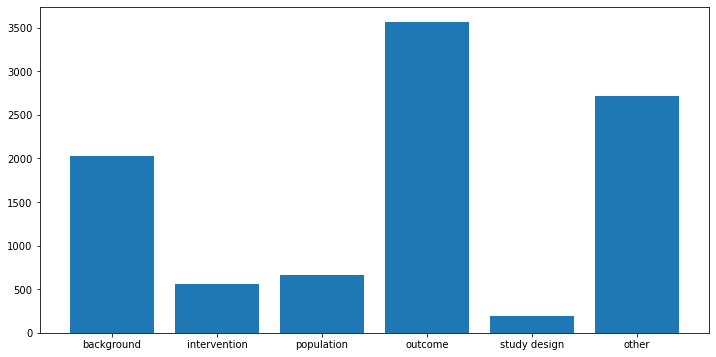

In [5]:
plt.figure(figsize=(12,6))
plt.bar(range(6), label_counts)
plt.xticks(range(6), labels)
plt.show()

We can see that the training data contain 800 documents:

In [6]:
documents = list(set(train_pd['Document']))
print(len(documents))

800


# Task 1 (5 marks): Data partition
Based on the list of documents (for example, use the variable `documents` above), partition the data into three sets: a training set, a devtest set, and a test set, so that:

* The training set uses 600 documents.
* The dev-test set uses 100 documents.
* The test set uses 100 documents.

Make sure that the partition is a **random partition**. That is, you need to shuffle the list of documents before you make the partitions. Also, to facilitate reproducibility, execute the following cell that sets a specific random seed:



In [7]:
import random
random.seed(1234)

After writing the code, answer the following questions using additional text cells in this Jupyter notebook:

1. (1 mark) Why do we want to use document IDs, and not individual sentences, to make the partition?
2. (1 mark) Plot the distribution of labels in each partition and comment on whether these distributions are similar.

The remaining 3 marks are for the code that performs the partition.

Hint: If you want to iterate through each row of the pandas data frame `train_pd`, you can use `itertuples`. Read, for example:

* https://www.geeksforgeeks.org/different-ways-to-iterate-over-rows-in-pandas-dataframe/
* https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas

Here is some code that shows the output of `itertuples`  over the first three rows:

```
train_pd_tuples = [r for r in train_pd.itertuples(index=False, name=None)]
train_pd_tuples[:3]
```

In [8]:
# SOLUTION
random.shuffle(documents)

In [9]:
training_documents = documents[:600]
devtest_documents = documents[600:700]
test_documents = documents[700:]

In [10]:
training_set = []
for d in training_documents:
    document_data = train_pd[train_pd['Document'] == d]
    training_set += list(document_data.itertuples(index=False, name=None))
training_set[:3]

[(12294592,
  1,
  'The US Office of Family Planning (FP) has issued 10 research grants ranging from $100,000 to $250,000 to organizations seeking to develop, implement, and test ways to involve young men in FP and reproductive health services.',
  1,
  0,
  0,
  0,
  0,
  0),
 (12294592,
  2,
  'While only 2% of federal dollars are currently earmarked for reproductive health services for young men, a survey revealed that only 32% of sexually active men and 17% of sexually inexperienced men reported receiving contraceptive information from health ',
  1,
  0,
  0,
  0,
  0,
  0),
 (12294592,
  3,
  'One grant recipient is a cooperative venture of the University of North Carolina, the Guilford County health department, and &quot;Wise Guys,&quot; a male responsibility/adolescent pregnancy prevention program developed by the local Family Life Council in',
  1,
  0,
  0,
  0,
  0,
  0)]

In [11]:
devtest_set = []
for d in devtest_documents:
    document_data = train_pd[train_pd['Document'] == d]
    devtest_set += list(document_data.itertuples(index=False, name=None))
devtest_set[:3]

[(14720063,
  1,
  'Lung transplantation has emerged as an option to prolong and increase the quality of life in patients with end-stage pulmonary lung disease.',
  1,
  0,
  0,
  0,
  0,
  0),
 (14720063,
  2,
  'In lung transplant recipients, because of the high potential for acute and chronic allograft rejection, optimal selection, dosage and delivery of immunosuppressive medications is critical.',
  1,
  0,
  0,
  0,
  0,
  0),
 (14720063,
  3,
  'Cystic fibrosis (CF), a multi-organ system disease that often includes pulmonary and gastrointestinal manifestations, represents the leading indication for bilateral lung transplantation.',
  1,
  0,
  0,
  0,
  0,
  0)]

In [12]:
test_set = []
for d in test_documents:
    document_data = train_pd[train_pd['Document'] == d]
    test_set += list(document_data.itertuples(index=False, name=None))
test_set[:3]

[(12802919,
  1,
  'The effect of poor blood stem cells mobilization on the outcome of autologous stem cell transplantation (ASCT) has not been well studied.',
  1,
  0,
  0,
  0,
  0,
  0),
 (12802919,
  2,
  'Our aim is to evaluate poor mobilization as a prognostic factor in lymphoma patients undergoing ASCT.',
  1,
  0,
  0,
  0,
  0,
  0),
 (12802919,
  3,
  "We analyzed 90 consecutive patients with Hodgkin's (HD) and non-Hodgkin's lymphoma (NHL) who underwent ASCT.",
  0,
  1,
  0,
  0,
  1,
  0)]

In [13]:
labels = ['background', 'intervention', 'other', 'outcome', 'population', 'study design']
label_counts = [0,0,0,0,0,0]
for r in training_set:
    for i, l in enumerate(labels):
        label_counts[i] += r[i+3]
print(label_counts)

[1537, 419, 2044, 2644, 501, 147]


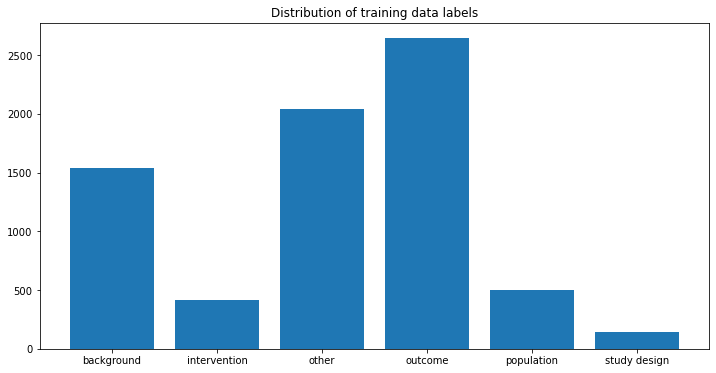

In [14]:
plt.figure(figsize=(12,6))
plt.bar(range(6), label_counts)
plt.xticks(range(6), labels)
plt.title("Distribution of training data labels")
plt.show()

[253, 83, 347, 475, 78, 21]


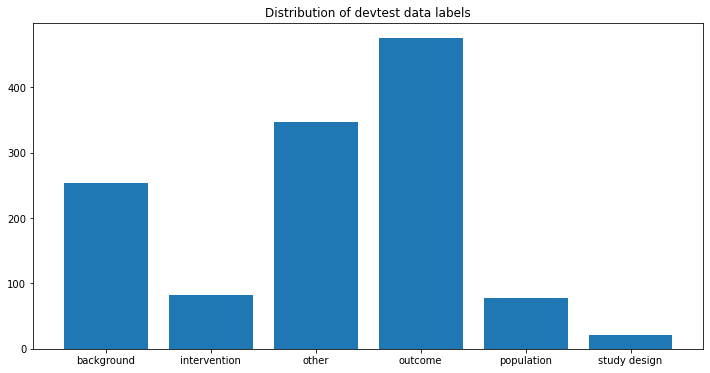

In [15]:
label_counts = [0,0,0,0,0,0]
for r in devtest_set:
    for i, l in enumerate(labels):
        label_counts[i] += r[i+3]
print(label_counts)
plt.figure(figsize=(12,6))
plt.bar(range(6), label_counts)
plt.xticks(range(6), labels)
plt.title("Distribution of devtest data labels")
plt.show()

[241, 63, 321, 445, 83, 25]


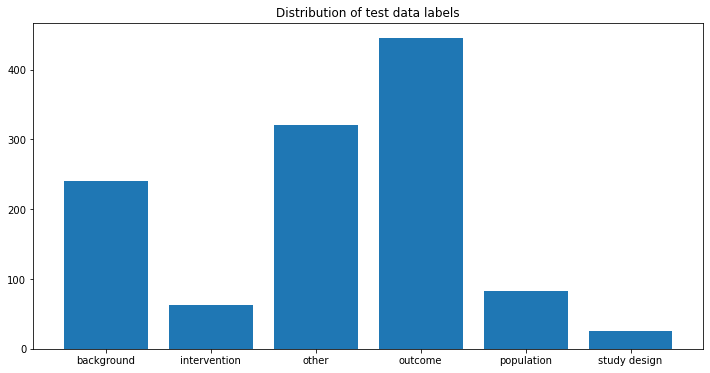

In [16]:
label_counts = [0,0,0,0,0,0]
for r in test_set:
    for i, l in enumerate(labels):
        label_counts[i] += r[i+3]
print(label_counts)
plt.figure(figsize=(12,6))
plt.bar(range(6), label_counts)
plt.xticks(range(6), labels)
plt.title("Distribution of test data labels")
plt.show()

* **Answer to question 1:** We want to use document IDs, and not individual sentences, to avoid the problem of contaminating the training data. Since a document contains multiple sentences, if we partition on the sentences, sentences from the same document may appear in the training and the test data.
* **Answer to question 2:** The distributions of labels are similar so the partitions can be used for training, finetuning and test.

# Task 2 (5 marks): Naive Bayes

Using scikit-learn, train 6 separate Naive Bayes classifiers (hint: use `MultinomialNB` for each of the classifiers). Each classifier must be trained with the part of the training data that corresponds with one of the possible labels. For example:

1. Train a Naive Bayes classifier using only the data that corresponds with the "background" label.
2. Train a **different** Naive Bayes classifier using only the data that corresponds with the "intervention" label.
3. And so on with the other labels, for a total of 6 different classifiers.

Make sure that you train only with the training data. For each classifier, report the accuracy on the training data, devtest data, and test data.

Use tf.idf of the top 10000 words as the feature extractor (hint: use scikit-learn's `TfidfVectorizer`, and use the option `max_features=10000`). You do not need to use stop words or stemming for this task.

Report the evaluation of your classifers and answer the following questions.

1. (1 mark) What evaluation metric did you choose and why?
2. (1 mark) Comment on whether any of the 6 classifiers is overfitting and explain how you determined whether they are overfitting.

The remaining 3 marks will be allocated to the code that implements and evaluates the Naive Bayes classifiers.

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score

labels = ['background', 'intervention', 'other', 'outcome', 'population', 'study design']

def NaiveBayes(label):
    print()
    print("Processing", labels[label], "labels")
    tfidf = TfidfVectorizer(input='contents', max_features=10000)
    nb = MultinomialNB()
    #
    train_tfidf = tfidf.fit_transform([r[2] for r in training_set])
    train_labels = [r[label+3] for r in training_set]
    nb.fit(train_tfidf, train_labels)
    train_predictions = nb.predict(train_tfidf)
    train_f1 = f1_score(train_labels, train_predictions)
    print("Training F1 =", train_f1)
    #
    devtest_tfidf = tfidf.transform([r[2] for r in devtest_set])
    devtest_labels = [r[label+3] for r in devtest_set]
    devtest_predictions = nb.predict(devtest_tfidf)
    devtest_f1 = f1_score(devtest_labels, devtest_predictions)
    print("Devtest F1 =", devtest_f1)
    #
    test_tfidf = tfidf.transform([r[2] for r in test_set])
    test_labels = [r[label+3] for r in test_set]
    test_predictions = nb.predict(test_tfidf)
    test_f1 = f1_score(test_labels, test_predictions)
    print("Test F1 =", test_f1)

In [18]:
for l in range(6):
    NaiveBayes(l)


Processing background labels
Training F1 = 0.36238044633368754
Devtest F1 = 0.12454212454212454
Test F1 = 0.0784313725490196

Processing intervention labels
Training F1 = 0.004761904761904762
Devtest F1 = 0.0
Test F1 = 0.0

Processing other labels
Training F1 = 0.7601208459214501
Devtest F1 = 0.726605504587156
Test F1 = 0.6694214876033058

Processing outcome labels
Training F1 = 0.832663422889782
Devtest F1 = 0.6486486486486487
Test F1 = 0.6666666666666666

Processing population labels
Training F1 = 0.003984063745019919
Devtest F1 = 0.0
Test F1 = 0.0

Processing study design labels
Training F1 = 0.0
Devtest F1 = 0.0
Test F1 = 0.0


* **Answer to question 1:** We use F1 and not accuracy because the data are not balanced. For example "study design" is a very rare label and a simple baseline that always says that a sentence is not a study design would have very  high accuracy.
* **Answer to question 2:** We observe that some of the results are very bad, with some F1 scores of 0. Even with the best results we can see that the system is overfitting. We can tell this because the results of the training data are better than those of the devtest and test data.

# Task 3 (5 marks): A Simple Neural Network
Implement a simple TensorFlow-Keras neural model that has the following sequence of layers:

1. An input layer that will accept tf.idf information.
2. An output layer that has 6 cells. Each cell will classify the sentence into one of the 6 possible sentence types.

As in the previous task, train the classifier with the tf.idf information of the input sentences. (Hint: sklearn produces sparse tf.idf matrices but TensorFlow models only accept dense matrices so you need to convert the tf_idf matrix of the training data into a dense Numpy array. As we have seen in the lectures, you can use `toarray` to convert the sparse matrix into a dense Numpy array.)

Train and test your system and report on the results. Include text cells in this Jupyter notebook where you must answer the following questions (2 marks):

1. How many parameters does the model have?
2. What is the optimal number of epochs? How do you know this is the optimal number of epochs?
3. Does your system overfit when training with the optimal number of epochs? How can you determine this?
4. How do the results compare against the Naive Bayes implementation of the previous task?

The remaining 3 marks will be allocated to the code.

In [1]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

IndexError: list index out of range

In [10]:
from tensorflow.config.experimental import list_physical_devices
list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:
devtest_tfidf = tfidf.transform([r[2] for r in devtest_set]).toarray()
devtest_labels = [r[3:9] for r in devtest_set]

NameError: name 'tfidf' is not defined

In [23]:
from tensorflow.keras import models, layers

simple_nn = models.Sequential()
simple_nn.add(layers.Dense(6, activation='sigmoid', input_shape=(len(tfidf.get_feature_names()),)))
simple_nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 60006     
Total params: 60,006
Trainable params: 60,006
Non-trainable params: 0
_________________________________________________________________


In [24]:
simple_nn.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [25]:
import numpy as np
history=simple_nn.fit(training_tfidf,
                      np.array(training_labels),
                      epochs=70,
                      batch_size=32,
                      validation_data=(devtest_tfidf, np.array(devtest_labels)))

Epoch 1/70
217/217 [==============================] - 1s 6ms/step - loss: 0.6223 - accuracy: 0.5155 - val_loss: 0.5614 - val_accuracy: 0.5507
Epoch 2/70
217/217 [==============================] - 1s 6ms/step - loss: 0.5164 - accuracy: 0.5345 - val_loss: 0.4765 - val_accuracy: 0.5541
Epoch 3/70
217/217 [==============================] - 1s 6ms/step - loss: 0.4460 - accuracy: 0.5374 - val_loss: 0.4219 - val_accuracy: 0.5583
Epoch 4/70
217/217 [==============================] - 1s 6ms/step - loss: 0.4003 - accuracy: 0.5453 - val_loss: 0.3870 - val_accuracy: 0.5642
Epoch 5/70
217/217 [==============================] - 1s 6ms/step - loss: 0.3700 - accuracy: 0.5566 - val_loss: 0.3640 - val_accuracy: 0.5726
Epoch 6/70
217/217 [==============================] - 1s 5ms/step - loss: 0.3491 - accuracy: 0.5756 - val_loss: 0.3484 - val_accuracy: 0.5887
Epoch 7/70
217/217 [==============================] - 1s 6ms/step - loss: 0.3342 - accuracy: 0.5919 - val_loss: 0.3373 - val_accuracy: 0.6022
Epoch 

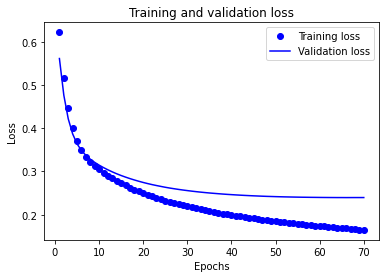

In [26]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

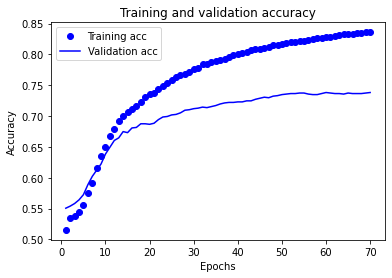

In [27]:
plt.clf()   # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

We are approximating best results at 70 epochs. We could have tried a few more epochs, but since the evaluation metric on the validation set seems stable, let's keep it at 70 epochs.

In [28]:
test_tfidf = tfidf.transform([r[2] for r in test_set]).toarray()
test_labels = [r[3:9] for r in test_set]

training_predictions = simple_nn.predict(training_tfidf)
devtest_predictions = simple_nn.predict(devtest_tfidf)
test_predictions = simple_nn.predict(test_tfidf)

In [29]:
training_predicted_labels = training_predictions >= 0.5
training_predicted_labels[:3]

array([[ True, False, False, False, False, False],
       [False, False, False, False, False, False],
       [ True, False, False, False, False, False]])

In [30]:
devtest_predicted_labels = devtest_predictions >= 0.5
devtest_predicted_labels[:3]

array([[ True, False, False, False, False, False],
       [False, False, False, False, False, False],
       [ True, False, False, False, False, False]])

In [31]:
test_predicted_labels = test_predictions >= 0.5
test_predicted_labels[:3]

array([[ True, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False,  True, False,  True, False]])

In [32]:
labels = ['background', 'intervention', 'other', 'outcome', 'population', 'study design']

for i, l in enumerate(labels):
    print()
    print("Evaluating", l,  "labels")
    training_f1 = f1_score(np.array(training_labels)[:,i], training_predicted_labels[:, i])
    print("Training F1 =", training_f1)
    devtest_f1 = f1_score(np.array(devtest_labels)[:,i], devtest_predicted_labels[:, i])
    print("Devtest F1 =", devtest_f1)
    test_f1 = f1_score(np.array(test_labels)[:,i], test_predicted_labels[:, i])
    print("Test F1 =", test_f1)



Evaluating background labels
Training F1 = 0.7732394366197184
Devtest F1 = 0.6247191011235956
Test F1 = 0.5882352941176471

Evaluating intervention labels
Training F1 = 0.45470085470085464
Devtest F1 = 0.22429906542056072
Test F1 = 0.15555555555555556

Evaluating other labels
Training F1 = 0.8653444676409187
Devtest F1 = 0.8248407643312102
Test F1 = 0.7813620071684588

Evaluating outcome labels
Training F1 = 0.8580935603836367
Devtest F1 = 0.7463687150837989
Test F1 = 0.7423887587822013

Evaluating population labels
Training F1 = 0.5608465608465609
Devtest F1 = 0.20952380952380953
Test F1 = 0.29059829059829057

Evaluating study design labels
Training F1 = 0.5410628019323672
Devtest F1 = 0.2962962962962963
Test F1 = 0.3870967741935484


* **Answer to question 1:** The model has 60,006 parameters.
* **Answer to question 2:** We haven't reached the optimal number of epochs, but since the results of the validation set have plateaued, the results are unlikely to be significantly better after 70 epochs. The results are stable since 50 epochs, so it is possible to train with 50 epochs only.
* **Answer to question 3:** We can see that the system clearly overfits since the results on the validation and test data are worse than the results on the training data.
* **Answer to question 4:** The results are now much better than with the Naive Bayes system. We can see that the system is overfitting, and the evaluation results of the intervention, population, and study design labels are bad. Still better than with Naive Bayes! The likely reason for the poor results with these labels is the few training data.

# Task 4 (5 marks): A Recurrent Neural Network
Implement a more complex neural network what is composed of the following sequence of layers:

* An embedding layer that generates **embedding vectors with 40 dimensions**. Tensorflow requires that this input list be of fixed length. You need to choose the appropriate length by examining the distribution of lengths of the input sentences. (Hint: to set the fixed input length, use TensorFlow's `pad_sequences`). Also, restrict the vocabulary to the **10000 most frequent words** of the training set (Hint: use [Keras' tokenizer](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer) with the option `num_words=10000`)
* A LSTM layer that generates an **output of 50 dimensions**.
* The final output layer composed of the **6 binary classifiers**.

Train the system on the training data and evaluate the results. Compare with the previous systems and conduct the same kind of analysis that you did in the previous tasks.

The marks for this task will be allocated as follows:

* 3 marks for the code.
* 2 marks for the explanations and analysis.

In [34]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Let's determine the optimal sentence length by examining the frequency distribution of sentences from the training set

In [35]:
training_lengths = [len(r[2]) for r in training_set]
training_lengths[:3]

[224, 255, 255]

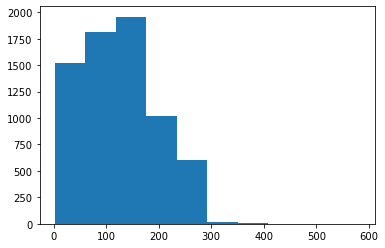

In [36]:
plt.hist(training_lengths)
plt.show()

We can see that most sentences have a length of 300 or less, so let's set a sentence length of 300.

In [37]:
num_words = 10000
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts([r[2] for r in training_set])

In [38]:
training_sequences = tokenizer.texts_to_sequences([r[2] for r in training_set])
devtest_sequences = tokenizer.texts_to_sequences([r[2] for r in devtest_set])
test_sequences = tokenizer.texts_to_sequences([r[2] for r in test_set])

In [39]:
maxlen = 300
training_vectors = pad_sequences(training_sequences, maxlen=maxlen)
devtest_vectors = pad_sequences(devtest_sequences, maxlen=maxlen)
test_vectors = pad_sequences(test_sequences, maxlen=maxlen)

In [40]:
embedding_dim=40
lstm_dim=40
lstm_model = models.Sequential()
lstm_model.add(layers.Embedding(num_words, embedding_dim, input_length=maxlen))
lstm_model.add(layers.LSTM(lstm_dim))
lstm_model.add(layers.Dense(6, activation='sigmoid'))
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 40)           400000    
_________________________________________________________________
lstm (LSTM)                  (None, 40)                12960     
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 246       
Total params: 413,206
Trainable params: 413,206
Non-trainable params: 0
_________________________________________________________________


In [41]:
lstm_model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = lstm_model.fit(training_vectors, 
                    np.array(training_labels),
                    epochs=10,
                    batch_size=32,
                    validation_data=(devtest_vectors, np.array(devtest_labels)))

Epoch 1/10
217/217 [==============================] - 6s 28ms/step - loss: 0.3633 - accuracy: 0.5217 - val_loss: 0.3262 - val_accuracy: 0.5684
Epoch 2/10
217/217 [==============================] - 8s 35ms/step - loss: 0.3011 - accuracy: 0.5949 - val_loss: 0.3056 - val_accuracy: 0.5971
Epoch 3/10
217/217 [==============================] - 8s 37ms/step - loss: 0.2443 - accuracy: 0.7021 - val_loss: 0.2620 - val_accuracy: 0.6715
Epoch 4/10
217/217 [==============================] - 6s 30ms/step - loss: 0.2057 - accuracy: 0.7544 - val_loss: 0.2338 - val_accuracy: 0.6951
Epoch 5/10
217/217 [==============================] - 8s 37ms/step - loss: 0.1763 - accuracy: 0.7837 - val_loss: 0.2558 - val_accuracy: 0.6985
Epoch 6/10
217/217 [==============================] - 7s 31ms/step - loss: 0.1551 - accuracy: 0.8125 - val_loss: 0.2417 - val_accuracy: 0.6816
Epoch 7/10
217/217 [==============================] - 8s 37ms/step - loss: 0.1383 - accuracy: 0.8325 - val_loss: 0.2538 - val_accuracy: 0.6774

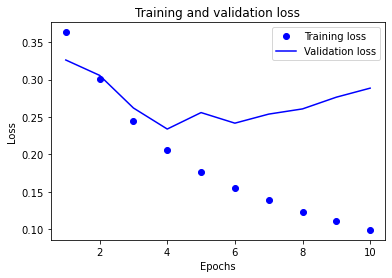

In [42]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

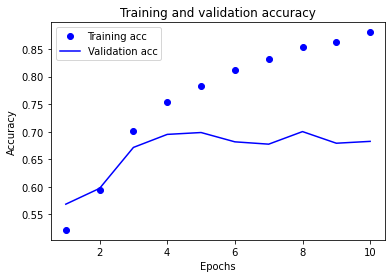

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

The optimal number of epochs is 4. Let's re-train the system, this time with only 4 epochs.

In [44]:
embedding_dim=40
lstm_dim=40
lstm_model = models.Sequential()
lstm_model.add(layers.Embedding(num_words, embedding_dim, input_length=maxlen))
lstm_model.add(layers.LSTM(lstm_dim))
lstm_model.add(layers.Dense(6, activation='sigmoid'))
lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 40)           400000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 40)                12960     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 246       
Total params: 413,206
Trainable params: 413,206
Non-trainable params: 0
_________________________________________________________________


In [45]:
lstm_model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = lstm_model.fit(training_vectors, 
                    np.array(training_labels),
                    epochs=4,
                    batch_size=32,
                    validation_data=(devtest_vectors, np.array(devtest_labels)))

Epoch 1/4
217/217 [==============================] - 7s 32ms/step - loss: 0.3637 - accuracy: 0.5190 - val_loss: 0.3296 - val_accuracy: 0.5591
Epoch 2/4
217/217 [==============================] - 8s 39ms/step - loss: 0.3068 - accuracy: 0.5798 - val_loss: 0.2894 - val_accuracy: 0.6478
Epoch 3/4
217/217 [==============================] - 8s 37ms/step - loss: 0.2468 - accuracy: 0.6899 - val_loss: 0.2554 - val_accuracy: 0.6664
Epoch 4/4
217/217 [==============================] - 6s 29ms/step - loss: 0.2006 - accuracy: 0.7528 - val_loss: 0.2406 - val_accuracy: 0.7035


In [46]:
training_predictions = lstm_model.predict(training_vectors)
devtest_predictions = lstm_model.predict(devtest_vectors)
test_predictions = lstm_model.predict(test_vectors)

In [47]:
training_predicted_labels = training_predictions >= 0.5
devtest_predicted_labels = devtest_predictions >= 0.5
test_predicted_labels = test_predictions >= 0.5

In [48]:
labels = ['background', 'intervention', 'other', 'outcome', 'population', 'study design']

for i, l in enumerate(labels):
    print()
    print("Evaluating", l,  "labels")
    training_f1 = f1_score(np.array(training_labels)[:,i], training_predicted_labels[:, i])
    print("Training F1 =", training_f1)
    devtest_f1 = f1_score(np.array(devtest_labels)[:,i], devtest_predicted_labels[:, i])
    print("Devtest F1 =", devtest_f1)
    test_f1 = f1_score(np.array(test_labels)[:,i], test_predicted_labels[:, i])
    print("Test F1 =", test_f1)


Evaluating background labels
Training F1 = 0.7972805933250927
Devtest F1 = 0.6666666666666667
Test F1 = 0.6286764705882353

Evaluating intervention labels
Training F1 = 0.14561027837259102
Devtest F1 = 0.13333333333333333
Test F1 = 0.030303030303030304

Evaluating other labels
Training F1 = 0.8984914344157504
Devtest F1 = 0.8145896656534954
Test F1 = 0.8053691275167785

Evaluating outcome labels
Training F1 = 0.8715701219512195
Devtest F1 = 0.7557502738225631
Test F1 = 0.7497168742921858

Evaluating population labels
Training F1 = 0.5859872611464968
Devtest F1 = 0.3925233644859813
Test F1 = 0.3177570093457944

Evaluating study design labels
Training F1 = 0.0
Devtest F1 = 0.0
Test F1 = 0.0


* **Answer to question 1:** The model has 413,206 parameters. This is much larger than with the simple neural network of task 2.
* **Answer to question 2:** The system quickly overfits, and the optimal numer of epochs is 4.
* **Answer to question 3:** Even with the optimal number of 4 epochs the system overfits a little. Overfitting increases as we increase the number of epochs.
* **Answer to question 4:** The results turn out to be worse than with the simpler NN of task 2.

# Submission of results

Your submission should consist of this Jupyter notebook with all your code and explanations inserted into the notebook. The notebook should contain the output of the runs.

**Do not submit multiple files. If you feel you need to submit multiple files, please contact Diego.Molla-Aliod@mq.edu.au first.**

Examine the cells of this notebook so that you can have an idea of how to format text for good visual impact. You can also read this [useful guide to the MarkDown notation](http://daringfireball.net/projects/markdown/syntax), which explains the format of the text cells.

Each task specifies a number of marks. The final mark of the assignment is the sum of all the marks of each individual task, after applying any deductions for late submission.

By submitting this assignment you are acknowledging that this is your own work. Any submissions that break the code of academic honesty will be penalised as per [the academic integrity policy](https://staff.mq.edu.au/work/strategy-planning-and-governance/university-policies-and-procedures/policies/academic-integrity).
